In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('winequalityN.csv')
df
test_data = df.copy(deep=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# Visualising Data 

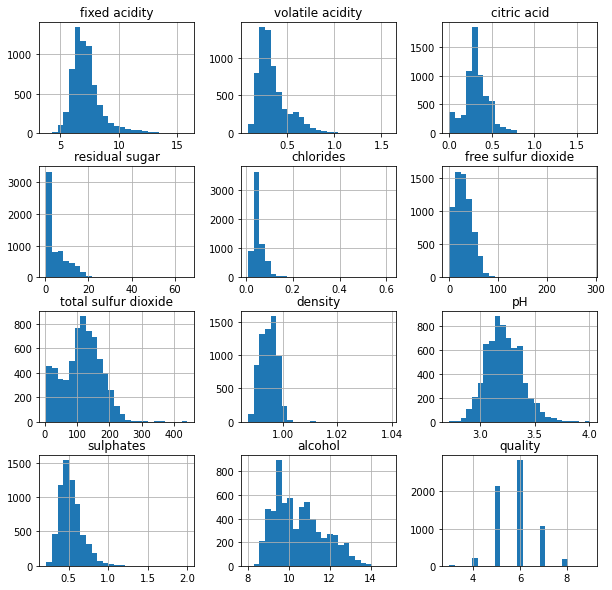

In [16]:
df.hist(bins = 25,figsize=(10,10))
plt.show()

# Plotting a correlation map to determine the correlation between the properties.

<AxesSubplot:>

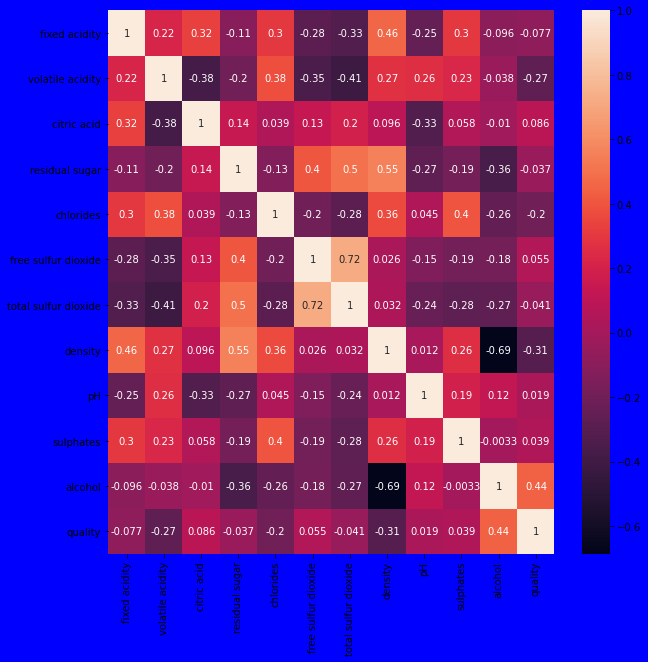

In [17]:
plt.figure(figsize = (10,10),facecolor='blue')
sns.heatmap(df.corr(),annot=True)

Since **Free Sulphur Dioxide** and **Total Sulphur Dioxide** have a correlation of 0.72, we can drop one of them as a part of feature engineering.

In [18]:
df.drop('total sulfur dioxide', axis = 1, inplace = True)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5


## Finding the null values.

In [19]:
df.isnull().sum()

type                    0
fixed acidity          10
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64

## Filling the null values with mean values.

In [20]:
df.fillna(df.mean())
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5


# Dealing with Catergorical Values.

In [21]:
cat_df = pd.get_dummies(df,drop_first=True)
cat_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,NaN,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5,0


## Adding a new column to make quality as Boolean value i.e., 1 or 0.

In [22]:
cat_df["best_quality"] = [1 if x>7 else 0 for x in df.quality]
cat_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white,best_quality
0,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.45,8.8,6,1,0
1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,6,1,0
2,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,6,1,0
3,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6,1,0
4,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5,0,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,NaN,11.2,6,0,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6,0,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5,0,0


# Preparing the data set and training the model.